# Its over

# Valmistelut

- Tiedostojen lukeminen
- Hyödylliset funktiot

In [1]:


import os
import numpy as np
from collections import defaultdict

#vaalipiirit: {nimi, koko}[]
vaalipiirit = [{"nimi": "Helsinki", "koko":23, "äänet": 388501
    },{"nimi": "Uusimaa", "koko": 37, "äänet": 565306
    },{"nimi": "Varsinais", "koko": 17, "äänet": 278772
    },{"nimi": "Satakunta", "koko": 8, "äänet": 119611
    },{"nimi": "Häme", "koko": 14, "äänet": 207266
    },{"nimi": "Pirkanmaa", "koko": 20, "äänet": 309941
    },{"nimi": "Kaakkois", "koko":15, "äänet":228628
    },{"nimi": "SavoKarjala", "koko":15, "äänet": 224357
    },{"nimi": "Vaasa", "koko":16, "äänet": 246966
    },{"nimi": "Keskisuomi", "koko":10, "äänet": 153254
    },{"nimi": "Oulu", "koko":18, "äänet": 261715
    },{"nimi": "Lappi", "koko":6, "äänet": 97904
}]

#Puoueet: {nimi, koko}[]
#paikat: int
def laske_paikat(puolueet, paikat):
    saajat = []
    for i in range(1,paikat+1):
        for puolue in puolueet:
            saajat.append([puolue["nimi"], puolue["koko"]/i])
    saajat.sort(key=lambda saaja: -saaja[1])
    saajat = saajat[:paikat]
    tulokset = defaultdict(lambda: 0)
    for puolue in puolueet:
        tulokset[puolue["nimi"]] = 0
    for paikka in saajat:
        tulokset[paikka[0]] += 1
    return tulokset

järjestys = ["VAS", "SDP", "VIHR", "RKP", "KESK", "KD", "PS",  "KOK"]

#puolueet: {nimi, lämpömittari[järjestys],  ääniosuudet: {}}[]
puolueet = [
    {"nimi": "VAS", "oikea": False, "lämpömittari": np.array([8.8, 6.8, 6.2, 4.6, 2.3, 2.1, 0.8,2.1]), "ääniosuudet": {}, "ääniosuudet19": {}},
    {"nimi": "SDP", "oikea": False, "lämpömittari":  np.array([5.8,8.5,5.2,4.3,4.0,3.2,2.3,3.6]), "ääniosuudet": {},"ääniosuudet19": {}},
    {"nimi": "VIHR", "oikea": False, "lämpömittari": np.array([7.2,7.2,8.7,5.2,3.6,2.4,1.2,4.2]), "ääniosuudet": {},"ääniosuudet19": {},"ääniosuudet19": {}},
    {"nimi": "RKP", "oikea": True, "lämpömittari": np.array([4.2,6.4,4.9,8.7,4.7,4.5,1.9,6.1]), "ääniosuudet": {},"ääniosuudet19": {}},
    {"nimi": "KESK", "oikea": True, "lämpömittari": np.array([3.1,5.0,3.4,4.8,8.3,5.5,4.5,6.3]), "ääniosuudet": {},"ääniosuudet19": {}},
    {"nimi": "KD", "oikea": True, "lämpömittari": np.array([2.6,4.7,2.9,4.7,5.1,8.5,5.4,6.1]), "ääniosuudet": {},"ääniosuudet19": {}},
    {"nimi": "PS", "oikea": True, "lämpömittari": np.array([1.7,3.6,1.3,2.6,4.1,4.9,8.6,5.9]), "ääniosuudet": {},"ääniosuudet19": {}},
    {"nimi": "KOK", "oikea": True, "lämpömittari": np.array([2.5,4.4,4.2,5.3,5.1,4.9,4.6,8.5]), "ääniosuudet": {},"ääniosuudet19": {}},
]

#Lue datat

for vaalipiiri in vaalipiirit:
    polku2023 = os.path.join("Data/2023", (vaalipiiri["nimi"] + ".csv"))
    with open(polku2023, "r") as piiricsv:
        puoluedata = {}
        tempJärj = []
        for i, line in enumerate(piiricsv):
            if i == 2:
                tempJärj = line.replace("\"", "").replace("\n", "").split(";")
            elif i == 3:
                for i, osuus in enumerate(line.replace(",", ".").split(";")):
                    puoluedata[tempJärj[i]] = float(osuus)
        for puolue in puolueet:
            puolue["ääniosuudet"][vaalipiiri["nimi"]] = puoluedata[puolue["nimi"]]
    polku2019 = os.path.join("Data/2019", (vaalipiiri["nimi"] + ".csv"))
    with open(polku2019, "r") as piiricsv:
        puoluedata = {}
        for line in piiricsv:
            rivi = line.replace("\"", "").replace("\n", "").split(";")
            if rivi[-2] == '':
                continue
            puoluedata[rivi[0]] = float(rivi[-2].replace(",", "."))
 
        for puolue in puolueet:
            puolue["ääniosuudet19"][vaalipiiri["nimi"]] = puoluedata[puolue["nimi"]]

print(puolueet)


[{'nimi': 'VAS', 'oikea': False, 'lämpömittari': array([8.8, 6.8, 6.2, 4.6, 2.3, 2.1, 0.8, 2.1]), 'ääniosuudet': {'Helsinki': 11.8, 'Uusimaa': 4.6, 'Varsinais': 11.6, 'Satakunta': 8.3, 'Häme': 5.9, 'Pirkanmaa': 6.9, 'Kaakkois': 3.7, 'SavoKarjala': 5.5, 'Vaasa': 2.4, 'Keskisuomi': 6.5, 'Oulu': 9.4, 'Lappi': 9.9}, 'ääniosuudet19': {'Helsinki': 11.1, 'Uusimaa': 4.8, 'Varsinais': 12.8, 'Satakunta': 10.0, 'Häme': 7.4, 'Pirkanmaa': 8.1, 'Kaakkois': 4.2, 'SavoKarjala': 7.2, 'Vaasa': 3.3, 'Keskisuomi': 8.2, 'Oulu': 13.1, 'Lappi': 14.2}}, {'nimi': 'SDP', 'oikea': False, 'lämpömittari': array([5.8, 8.5, 5.2, 4.3, 4. , 3.2, 2.3, 3.6]), 'ääniosuudet': {'Helsinki': 20.9, 'Uusimaa': 19.9, 'Varsinais': 18.1, 'Satakunta': 24.6, 'Häme': 23.7, 'Pirkanmaa': 25.9, 'Kaakkois': 23.7, 'SavoKarjala': 19.1, 'Vaasa': 11.7, 'Keskisuomi': 22.8, 'Oulu': 13.8, 'Lappi': 18.1}, 'ääniosuudet19': {'Helsinki': 13.6, 'Uusimaa': 17.8, 'Varsinais': 17.8, 'Satakunta': 25.2, 'Häme': 24.0, 'Pirkanmaa': 22.1, 'Kaakkois': 24.4,

In [2]:
from matplotlib import pyplot as plt
import matplotlib as mlp

plt.rcParams['axes.facecolor'] = '#f2f2f2'

def palkit_muutos(vanhat_paikat, uudet_paikat, key, otsikko, skaala = 60, lista = järjestys):
    fig = plt.figure(key)
    plt.ylim(0, skaala)
    plt.ylabel('Paikat')
    fig.patch.set_facecolor('#f2f2f2')
    for puolue in lista:
        plt.bar(puolue, vanhat_paikat[puolue], color="#8c5b8a", edgecolor="black")
        if(vanhat_paikat[puolue] < uudet_paikat[puolue]):
            plt.bar(puolue, uudet_paikat[puolue] - vanhat_paikat[puolue], bottom=vanhat_paikat[puolue], color= "#b59fb0", edgecolor="black")
        else:
            plt.bar(puolue, vanhat_paikat[puolue] -  uudet_paikat[puolue], bottom=uudet_paikat[puolue], color= "#3f2147", edgecolor="black")
    plt.title(otsikko)

In [3]:
## Puolue = {nimi: string, koko(äänet): number}

def normalisoi(data):
    return data/sum(data)

# Korkeampi T - enemmän satunnaisuutta
def softmax(data, T = 1):
    newData = np.exp(data/T)
    return normalisoi(newData)

## Todelliset lopputulokset (kaikki ja piirit)

In [4]:
from collections import defaultdict

lopputulosEnnen = defaultdict(lambda: 0)

lopputulosPiirissä = dict()


for vaalipiiri in vaalipiirit:
    piirinLopputulosEnnen = laske_paikat([{"nimi": puolue["nimi"], "koko": puolue["ääniosuudet"][vaalipiiri["nimi"]]} for puolue in puolueet], vaalipiiri["koko"])
    lopputulosPiirissä[vaalipiiri["nimi"]] = piirinLopputulosEnnen
    for puolue, osuus in piirinLopputulosEnnen.items():
        lopputulosEnnen[puolue] += osuus


## Lämpömittari

Muodostetaan satunnaisjakauma äänille lämpömittarin mukaan jokaisessa vaalipiirissä

In [5]:
from collections import defaultdict
from random import choices
from math import floor

toistot = 100

def arvo_ääni(jakauma):
    indeksit = list(range(len(jakauma)))
    return järjestys[choices(indeksit, weights=jakauma, k=1)[0]]


# for i in range(toistot):

t_arvot = [1]

for t in t_arvot:
    print(f"t={t}")
    lopputulos = defaultdict(lambda: 0)
    for i, vaalipiiri in enumerate(vaalipiirit):
        äänet = defaultdict(lambda: 0)
        for puolue in puolueet:
            jakauma = softmax(puolue["lämpömittari"], t)
            osuus = puolue["ääniosuudet"][vaalipiiri["nimi"]]
            if puolue["oikea"]:
                äänet[puolue["nimi"]] = osuus*vaalipiiri["äänet"]
            else:
                for j in range(floor(osuus*vaalipiiri["äänet"]/100)):
                    kohde = arvo_ääni(jakauma)
                    äänet[kohde] += 100
        piirinLopputulos = laske_paikat([{"nimi": k, "koko": v} for k, v in äänet.items()], vaalipiiri["koko"])
        nimi = vaalipiiri["nimi"]
        for puolue, paikat in piirinLopputulos.items():
            lopputulos[puolue] += paikat
    print(lopputulosEnnen, lopputulos)

t=1
defaultdict(<function <lambda> at 0x000001B749E874C0>, {'VAS': 12, 'SDP': 43, 'VIHR': 13, 'RKP': 9, 'KESK': 23, 'KD': 5, 'PS': 46, 'KOK': 48}) defaultdict(<function <lambda> at 0x000001B74B7F8D60>, {'VAS': 16, 'VIHR': 7, 'SDP': 45, 'RKP': 9, 'KD': 5, 'KESK': 23, 'KOK': 47, 'PS': 47})


# Keskitytään yhteen puolueeseen/vaalipiiri

Jokaisessa puolueessa jokainen äänestää suosikeistaan (mielipide >= 5) sitä, joka sai vuoden 2023 vaaleissa eniten ääniä.

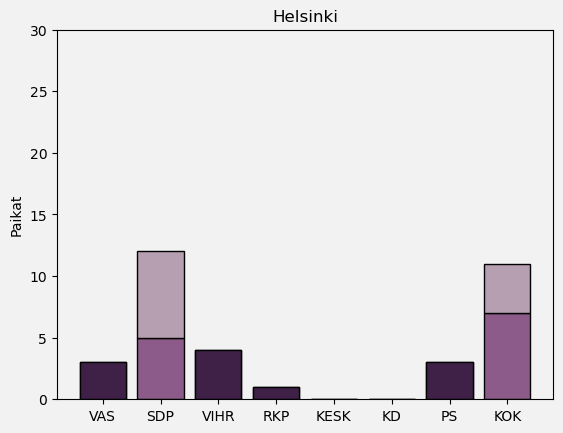

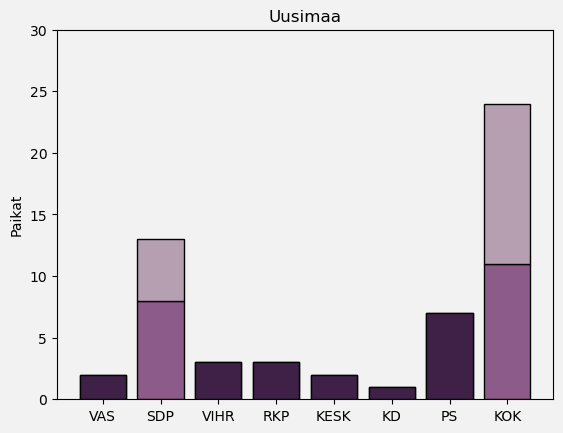

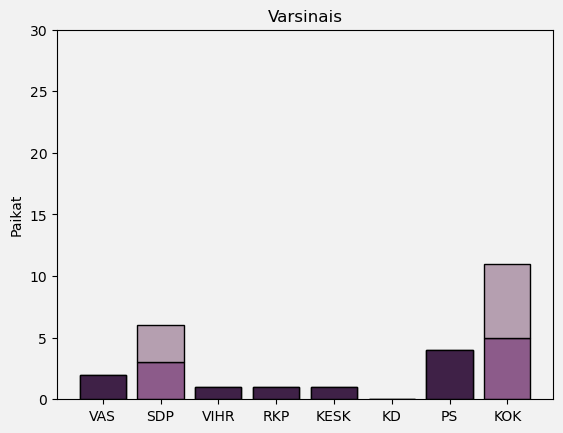

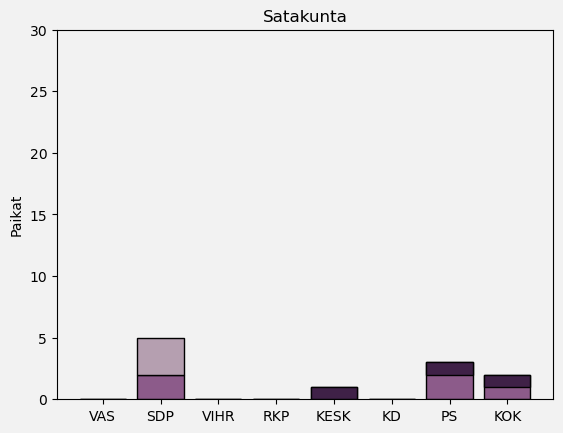

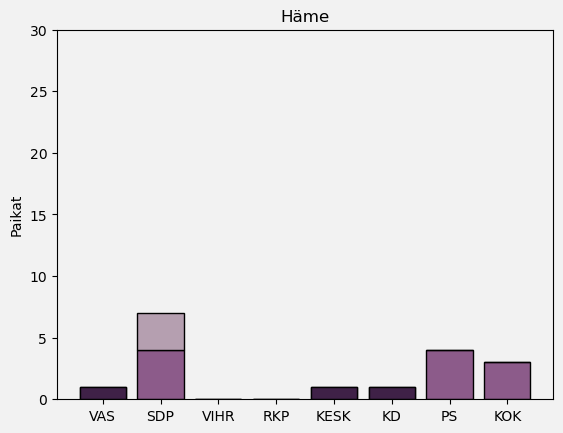

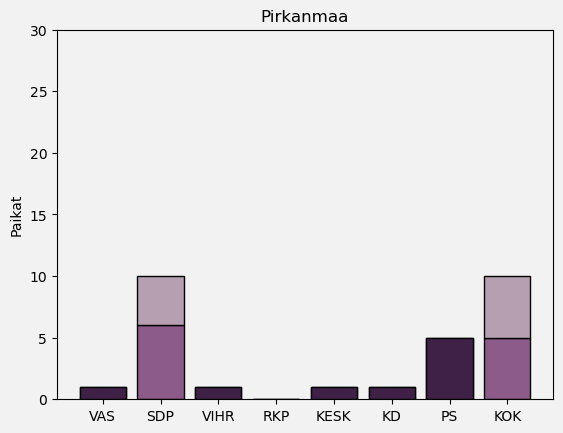

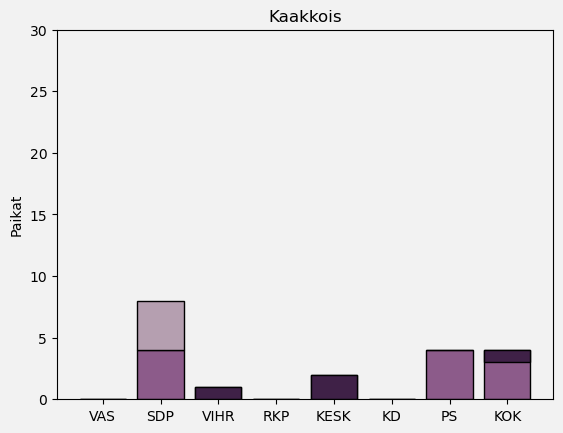

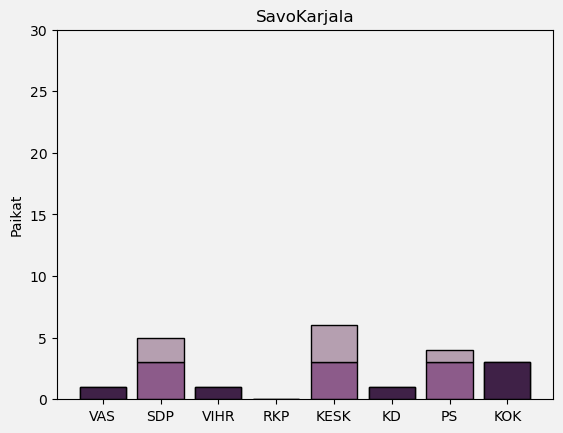

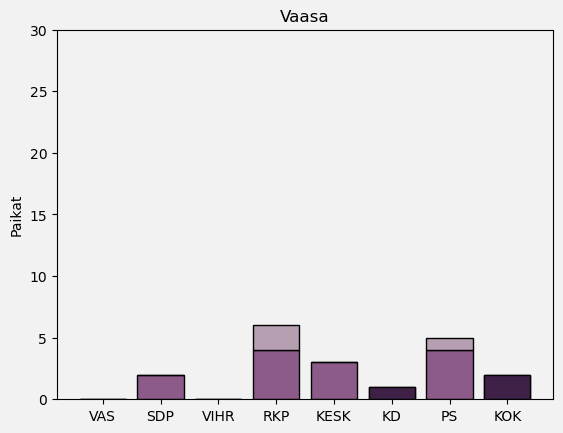

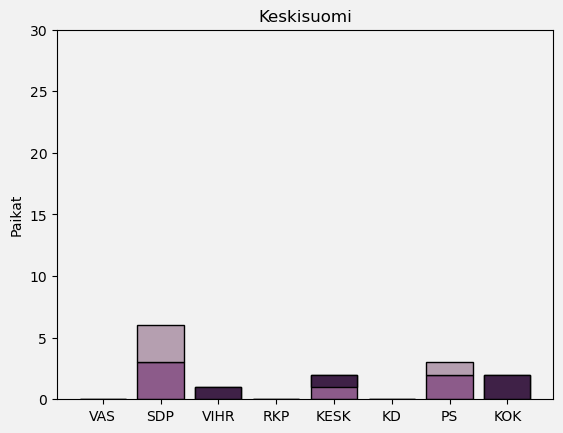

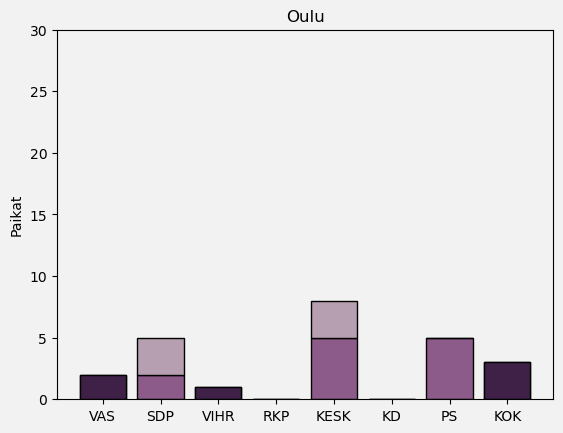

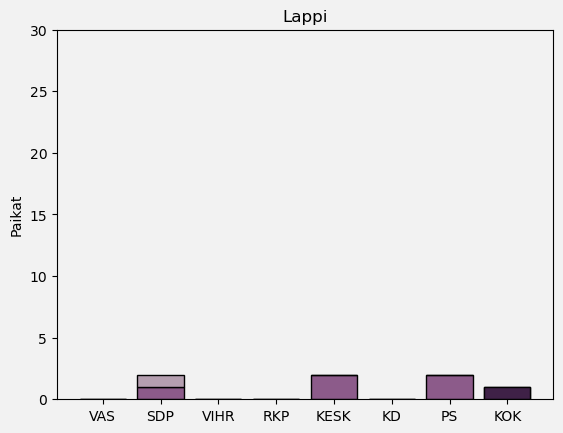

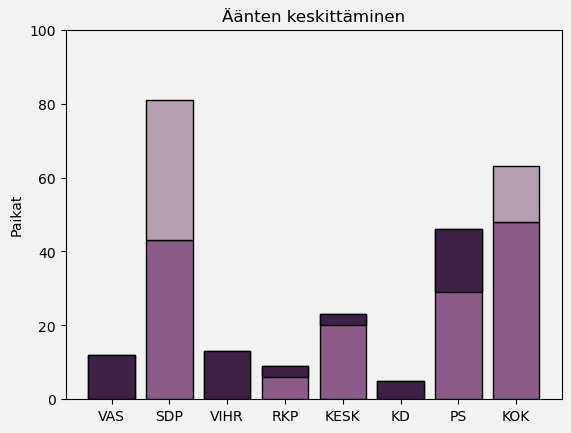

In [6]:
from collections import defaultdict

toistot = 100

# for i in range(toistot):

t_arvot = [1, 2, 3, 5, 10]

lopputulos = defaultdict(lambda: 0)
for i, vaalipiiri in enumerate(vaalipiirit):
    äänet = defaultdict(lambda: 0)
    for puolue in puolueet:
        osuus = puolue["ääniosuudet"][vaalipiiri["nimi"]]
        suosikit = [puolueet[i] for i in range(len(järjestys)) if puolue["lämpömittari"][i] >= 5]
        suosikit.sort(key=lambda suos: suos["ääniosuudet"][vaalipiiri["nimi"]], reverse=True)
        äänet[suosikit[0]["nimi"]] += osuus
    
    piirinLopputulos = laske_paikat([{"nimi": k, "koko": v} for k, v in äänet.items()], vaalipiiri["koko"])
    palkit_muutos(lopputulosPiirissä[vaalipiiri["nimi"]], piirinLopputulos, 45431+i, vaalipiiri["nimi"], skaala=30)
    for puolue, paikat in piirinLopputulos.items():
        lopputulos[puolue] += paikat
palkit_muutos(lopputulosEnnen,lopputulos,123456,f"Äänten keskittäminen", skaala=100)

## Aidosti dominoiva tasapainostrategia

- Pelkkä VAS ja OIK, yhdistetään

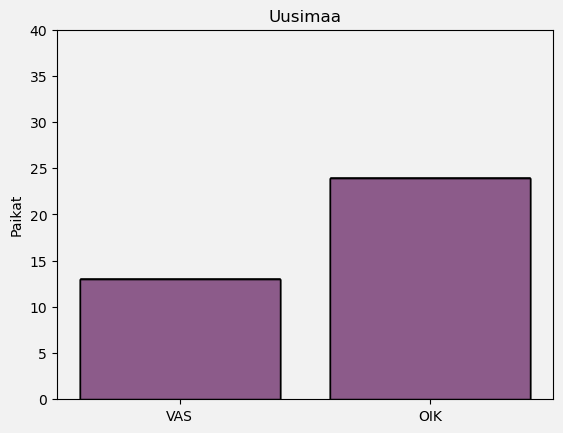

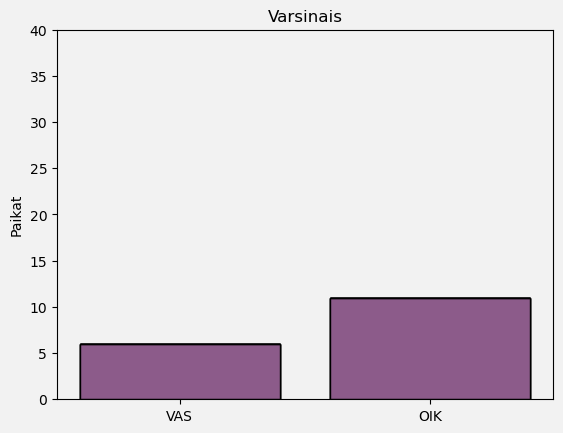

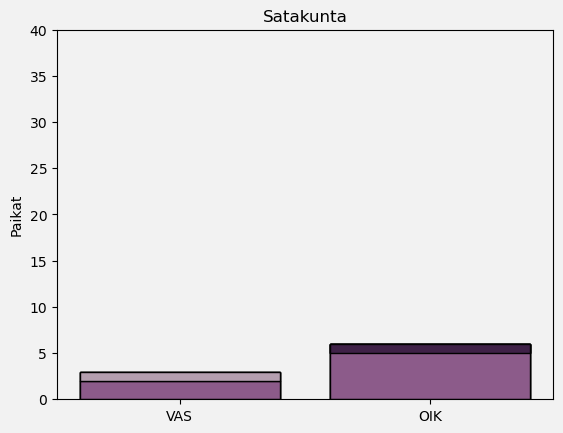

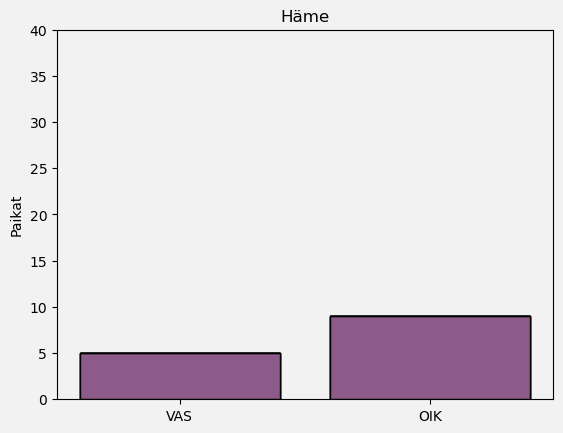

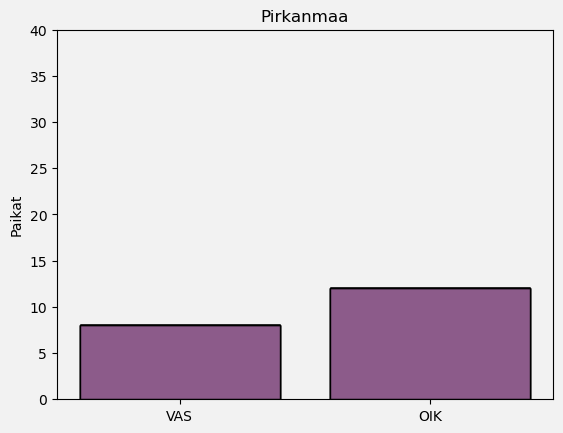

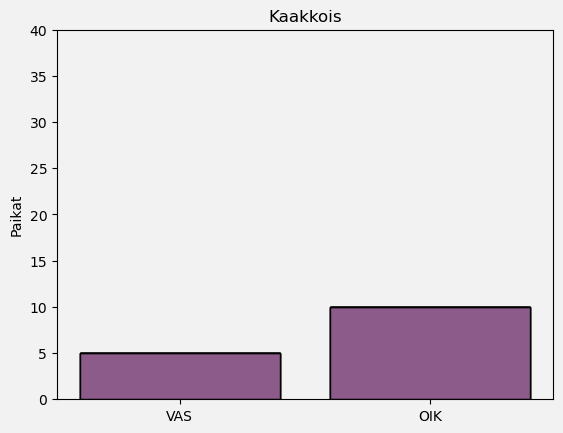

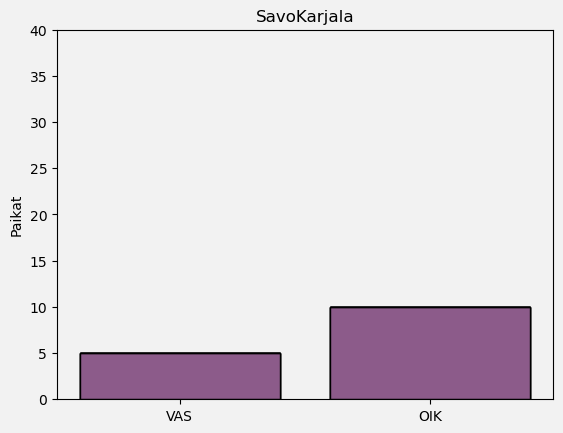

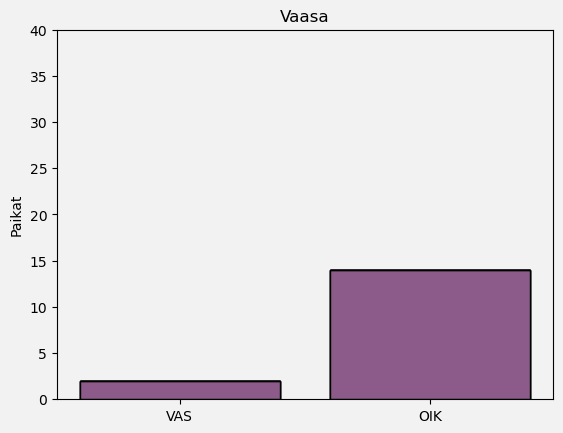

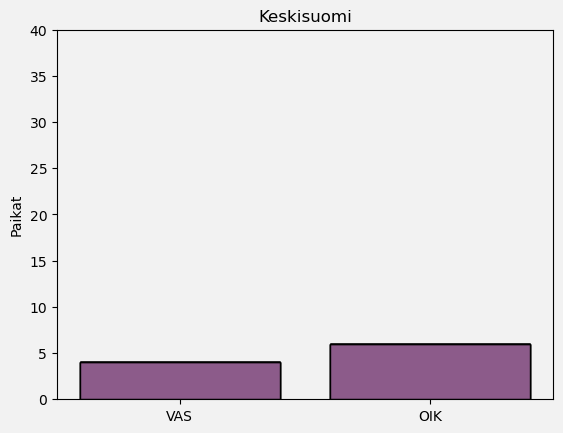

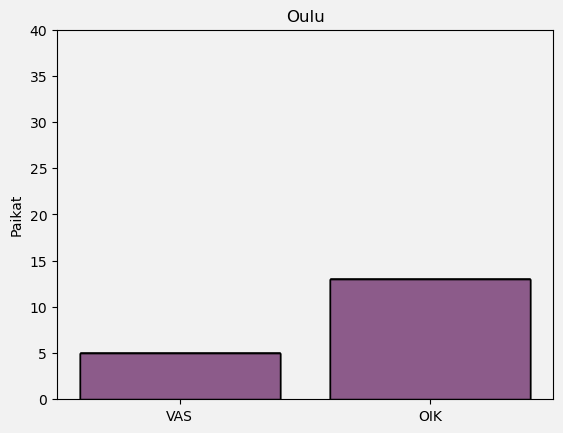

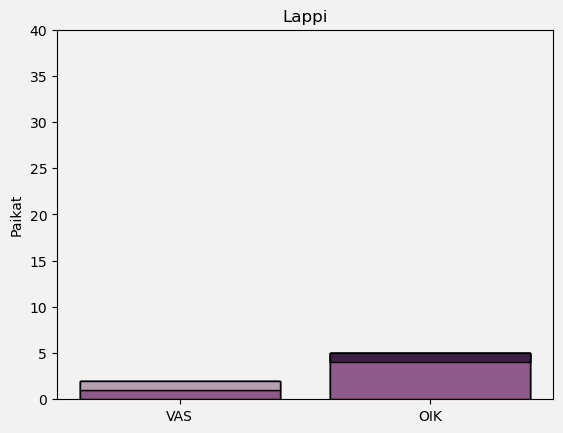

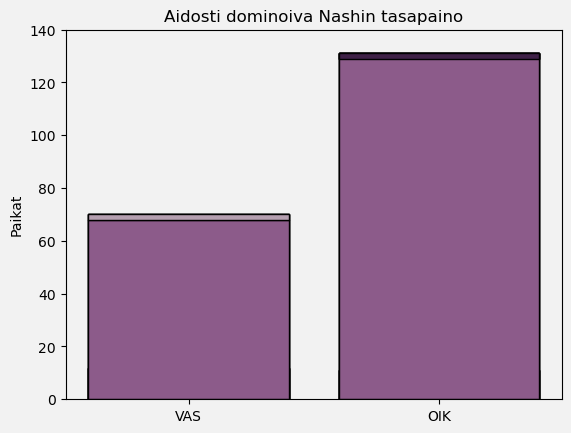

In [7]:
for vanhat_oik in range(0,2):
    for vanhat_vas in range(0,2):
        lopputulos = defaultdict(lambda: 0)
        for i, vaalipiiri in enumerate(vaalipiirit):
            äänet_vas =  sum([puolue["ääniosuudet"][vaalipiiri["nimi"]] for puolue in puolueet if not puolue["oikea"]])
            äänet_oik = sum([puolue["ääniosuudet"][vaalipiiri["nimi"]] for puolue in puolueet if puolue["oikea"]])
            piirin_tulos = laske_paikat([{"nimi": "VAS", "koko": äänet_vas}, {"nimi": "OIK", "koko": äänet_oik}], vaalipiiri["koko"])
            lopputulos["VAS"] += piirin_tulos["VAS"]
            lopputulos["OIK"] += piirin_tulos["OIK"]
            vanhat_paikat_oikvas_piiri = {
                "VAS": sum([paikat for pl, paikat in lopputulosPiirissä[vaalipiiri["nimi"]].items() if [not ple["oikea"] for ple in puolueet if ple["nimi"] == pl][0] ]),
                "OIK": sum([paikat for pl, paikat in lopputulosPiirissä[vaalipiiri["nimi"]].items() if [ple["oikea"] for ple in puolueet if ple["nimi"] == pl][0] ])
            }
            palkit_muutos(vanhat_paikat_oikvas_piiri, piirin_tulos, 12345+i, vaalipiiri["nimi"], 40, ["VAS", "OIK"])
        vanhat_paikat_oikvas = {
            "VAS": sum([paikat for pl, paikat in lopputulosEnnen.items() if [not ple["oikea"] for ple in puolueet if ple["nimi"] == pl][0] ]),
            "OIK": sum([paikat for pl, paikat in lopputulosEnnen.items() if [ple["oikea"] for ple in puolueet if ple["nimi"] == pl][0] ])
        }
        palkit_muutos(vanhat_paikat_oikvas, lopputulos, 12345, "Aidosti dominoiva Nashin tasapaino", 140,  ["VAS", "OIK"])


## 2019 äänijakauma

- Tutkitaan, tekikö vasemmistoliiton äänestäjät virheen siirtyessään äänestämään SDP:tä
- Olisiko siis ollut parempi äänestää vuoden 2019 jakaumalla?

defaultdict(<function <lambda> at 0x000001B749E874C0>, {'VAS': 12, 'SDP': 43, 'VIHR': 13, 'RKP': 9, 'KESK': 23, 'KD': 5, 'PS': 46, 'KOK': 48}) defaultdict(<function <lambda> at 0x000001B74C54F060>, {'VAS': 14, 'SDP': 35, 'VIHR': 19, 'RKP': 9, 'KESK': 23, 'KD': 5, 'PS': 47, 'KOK': 47})


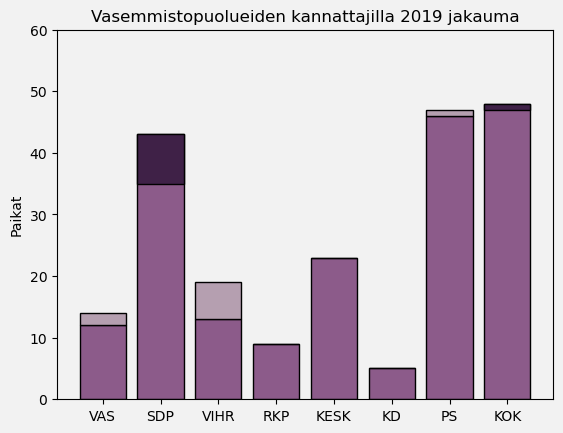

In [8]:
lopputulos = defaultdict(lambda: 0)


for vaalipiiri in vaalipiirit:
    äänet = defaultdict(lambda: 0)
    kaikki_äänet = vaalipiiri["äänet"]
    vasemmisto_summa_ennen = sum([puolue["ääniosuudet19"][vaalipiiri["nimi"]] for puolue in puolueet if not puolue["oikea"]])
    vasemmisto_summa_nyt = sum([puolue["ääniosuudet"][vaalipiiri["nimi"]] for puolue in puolueet if not puolue["oikea"]])
    for puolue in puolueet:
            if puolue["oikea"]:
                  äänet[puolue["nimi"]] = puolue["ääniosuudet"][vaalipiiri["nimi"]]*kaikki_äänet
            else:
                  äänet[puolue["nimi"]] = vasemmisto_summa_nyt*(puolue["ääniosuudet19"][vaalipiiri["nimi"]]/vasemmisto_summa_ennen)*kaikki_äänet
    lopputulosPiirissä = laske_paikat([{"nimi": k, "koko": v} for k, v in äänet.items()], vaalipiiri["koko"])
    for puolue, paikat in lopputulosPiirissä.items():
          lopputulos[puolue] += paikat
print(lopputulosEnnen, lopputulos)
palkit_muutos(lopputulosEnnen,lopputulos, 123456722, "Vasemmistopuolueiden kannattajilla 2019 jakauma")

## Optimointi

Yritetään saada jokaisessa vaalipiirissä mahdollisimman paljon paikkoja

- Vasen optimoi
- Oikea optimoi
- Vasen ja oikea optimoi (osen ja vaikea)

In [9]:
# Tarvitaan funktio, joka laskee ylimääräiset äänet
# Ja sellainen funktio, joka järjestää puolueet sen mukaan, paljonko ne tarvitsevat ääniä saadakseen uuden ehdokkaan läpi
# Vasen ja oikea pitää varmaan tehä silleen että ensin vasen ja sitten oikea tai toisinpäin
# Tai sitten molemmat optimoi vanhan datan perusteella

# Pitää huomioida, että jos jää viimeiseksi ja toinen puolue tulee yli, voikin tippua (<--- skilll issue aaaaaaaa)

from math import ceil
from collections import defaultdict

def laske_järjestys(puolueet, paikat, ulos_jäävät = False):
    saajat = []
    for i in range(1,paikat+1):
        for puolue in puolueet:
            saajat.append([puolue["nimi"], puolue["koko"]/i])
    saajat.sort(key=lambda saaja: -saaja[1])
    if ulos_jäävät:
        return saajat
    saajat = saajat[:paikat]
    return saajat

def laske_vertailulukukynnys(puolueet, paikat, n):
    järjestys = laske_järjestys(puolueet, paikat)
    kynnys_puolue = järjestys[-n]

    return kynnys_puolue[1]

def laske_annettavat_äänet(koko, puolueen_paikat, vertailulukukynnys):
    return max(koko - int(vertailulukukynnys*puolueen_paikat) - 1, 0)

def laske_tarvittavat_äänet(koko, puolueen_paikat, vertailulukukynnys):
    return ceil(vertailulukukynnys*(puolueen_paikat+1)) - koko + 1

# koko = paikat * vertailulukukynnys

# puolueet: {nimi: string, koko: number, oikea: boolean}[]

# Suunnitelma:
# Edelleen kokeillaan eri uusien paikkojen määrille i, kunnes tarvitaan enemmän kuin voidaan antaa
# Lista "antajat" (lajiteltu), muodostetaan uudestaan, kun osuudet muuttuvat
# Lista "vastaanottajat" (lajiteltu), muodostetaan uudestaan, kun osuudet muuttuvat
# "Antajat" antavat ääniä "vastaanottajille"


# TOIMII!!!

def optimoi(puolueet, paikat, vasen_optimoi):
    järjestys_nyt = laske_järjestys(puolueet, paikat)
    optimoivat_puolueet = [pl for pl in puolueet if pl["oikea"] ^ (vasen_optimoi)]
    max_paikat = 0
    for puolue in reversed(järjestys_nyt):
        # Jos puolue on oikealla ja oikea optimoi, ei kasvateta jne.         
        max_paikat += [pl["oikea"] ^ (not vasen_optimoi) for pl in puolueet if pl["nimi"] == puolue[0]][0]
    muutokset = defaultdict(lambda: 0)
    for i in range(1, max_paikat + 1):
        puolueiden_paikat = laske_paikat(puolueet, paikat)
        j = 0

        # k = pudotettavat_ehdokkaat
        k = 0
        ehdokkaat_vertailulukukynnyksen_alla = defaultdict(lambda: 0)
        for puolue in reversed(järjestys_nyt):
            if k >= i:
                break
            if [pl["oikea"] ^ (not vasen_optimoi) for pl in puolueet if pl["nimi"] == puolue[0]][0]:
                k += 1
            else:
                ehdokkaat_vertailulukukynnyksen_alla[puolue[0]] += 1
            j += 1
        vertailulukukynnys = laske_vertailulukukynnys(puolueet, paikat, j)
        yht_tarvittavat = 0
        temp_muutokset = defaultdict(lambda: 0)

        # Nostetaan jo paikan saaneet vertailulukukynnyksen yläpuolelle
        hoidetut_puolueet = set()
        for idx, puolue in enumerate(reversed(järjestys_nyt)):
            if idx >= j:
                break
            # Jos puolue on oikealla ja oikea optimoi, tarvitsee ääniä
            if [pl["oikea"] ^ (vasen_optimoi) for pl in puolueet if pl["nimi"] == puolue[0]][0]:
                if puolue[0] in hoidetut_puolueet:
                    continue
                tarvittavat_äänet = laske_tarvittavat_äänet([pl["koko"] for pl in puolueet if pl["nimi"] == puolue[0]][0], puolueiden_paikat[puolue[0]] + ehdokkaat_vertailulukukynnyksen_alla[puolue[0]] - 1, vertailulukukynnys)
                hoidetut_puolueet.add(puolue[0])
                yht_tarvittavat += tarvittavat_äänet
                temp_muutokset[puolue[0]] = tarvittavat_äänet
        paikat_nyt = laske_paikat([{"nimi": pl["nimi"], "koko": pl["koko"] + temp_muutokset[pl["nimi"]]} for pl in puolueet], paikat)
        annettavat_äänet = 0
        for pl in optimoivat_puolueet:
            puolueen_äänet = laske_annettavat_äänet(pl["koko"], paikat_nyt[pl["nimi"]], vertailulukukynnys)
            annettavat_äänet += puolueen_äänet
            temp_muutokset[pl["nimi"]] = -puolueen_äänet
        
        # Nostetaan vastakkaisen puolen ehdokkaiden määrän edestä ehdokkaita vertailulukuksen yläpuolelle
        outOfVotes = False
        for _ in range(k):
            lähimpänä_uutta_paikkaa = sorted(optimoivat_puolueet, key=lambda pl: laske_tarvittavat_äänet(pl["koko"] +temp_muutokset[pl["nimi"]], paikat_nyt[pl["nimi"]], vertailulukukynnys))
            vastaanottaja = lähimpänä_uutta_paikkaa[0]
            tarvittavat_äänet = laske_tarvittavat_äänet(vastaanottaja["koko"] +temp_muutokset[vastaanottaja["nimi"]], paikat_nyt[vastaanottaja["nimi"]], vertailulukukynnys)

            temp_muutokset[vastaanottaja["nimi"]] += tarvittavat_äänet
            yht_tarvittavat += tarvittavat_äänet
            if yht_tarvittavat > annettavat_äänet:
                outOfVotes = True
                break
            else:
                muutokset = temp_muutokset.copy()
            paikat_nyt = laske_paikat([{"nimi": pl["nimi"], "koko": pl["koko"] + temp_muutokset[pl["nimi"]]} for pl in puolueet], paikat)
        if outOfVotes:
            break
    return muutokset


# Kilpailevat vertailulukuryhmät (jokaisen puolueen alin ryhmässä, kaikille sama vertailuluku)
# Yritetään nostaa puolueita ryhmään
# Tiputetaan ryhmästä, kun ei äänet riitä supporttaamaan

# 0.5: laske_vertailuluvun_kasvu():

#optim_ryhmä: {nimi: string, paikat: number, annetut_äänet: number, saadut_äänet: number}[]

def laske_vertailulukupuskuri(ylim_äänet, optim_ryhmä):
    return ylim_äänet / sum([pl["paikat"] for pl in optim_ryhmä])



# Jokainen puolue: alin juuri vertailulukukynnyksen yläpuolella
def muodosta_optim_ryhmä(puolueet, paikat, vasen_optimoi):
    optimoivat_puolueet = [pl for pl in puolueet if pl["oikea"] ^ (vasen_optimoi)]
    vertailulukukynnys = laske_järjestys(puolueet, paikat, ulos_jäävät=True)[paikat][1]

    tilanne = laske_paikat(puolueet, paikat)
    annettavat_äänet = 0
    optim_ryhmä = []
    for pl in optimoivat_puolueet:
        annettavat_äänet = laske_annettavat_äänet(pl["koko"],tilanne[pl["nimi"]], vertailulukukynnys)
        puolue_optim = {"nimi": pl["nimi"], "paikat": tilanne[pl["nimi"]], "annetut_äänet": annettavat_äänet, "saadut_äänet": 0, "alkuperäiset_äänet": pl["koko"]}
        optim_ryhmä.append(puolue_optim)
    return optim_ryhmä, annettavat_äänet, vertailulukukynnys + 1

def lisää_ehdokas(optim_ryhmä, annettavat, vertailuluku, toisten_vertailuluku):
    # Sille, jolla on jo eniten paikkoja, on helpoin saada lisää
    # Kaikille onkin yhtä helppo saada lisää tyyppejä. Lajitellaan sittenkin vaikka sen mukaan, kuka voi itse antaa vähiten ääniä
    lähimpänä_uutta_paikkaa = sorted(optim_ryhmä, key=lambda pl: -pl["annetut_äänet"])[0]
    tarvittavat_äänet = vertailuluku
    uusi_annettavat = annettavat-tarvittavat_äänet
    print(laske_vertailulukupuskuri(uusi_annettavat, optim_ryhmä) + vertailuluku)
    print(toisten_vertailuluku)
    # Ei riitä äänet
    if uusi_annettavat < 0 or laske_vertailulukupuskuri(uusi_annettavat, optim_ryhmä) + vertailuluku < toisten_vertailuluku:
        return False, annettavat
    else:
        lähimpänä_uutta_paikkaa["paikat"] += 1
        lähimpänä_uutta_paikkaa["saadut_äänet"] += tarvittavat_äänet
        return True, uusi_annettavat


def poista_heikoin_ehdokas(optim_ryhmä, annettavat, vertailuluku, toisten_vertailuluku):
    # Koska en näköjään osaa integroida vaikka se on Tri-Wiaalia niin poistetaan vaan se millä on eniten saatuja ääniä.
    # Sillä ei nimittäin ole mitään väliä, paljonko paikkoja jollain puolueella on 
    eniten_turhia_ääniä = sorted(optim_ryhmä, key=lambda pl: -pl["saadut_äänet"])[0]

    # Do da math
    poistettavat_äänet = vertailuluku
    delta_vertailuluku = laske_vertailulukupuskuri(poistettavat_äänet, optim_ryhmä)
    eniten_turhia_ääniä["paikat"] -= 1
    eniten_turhia_ääniä["saadut_äänet"] -= poistettavat_äänet
    annettavat += poistettavat_äänet
    tod_vertailuluku = vertailuluku + laske_vertailulukupuskuri(annettavat, optim_ryhmä)
    # Jos vertailuluku riittää, voidaan jättää ylimääräiset äänet tulevaa käyttöä varten
    if tod_vertailuluku + delta_vertailuluku > toisten_vertailuluku:
        for pl in optim_ryhmä:
            # TODO: Mitäs tässä tapahtuu?Otetaanko kaikki takaisin?
            vertailulukukynnyksen_ylitys = (toisten_vertailuluku-tod_vertailuluku)*pl["paikat"]
            pl["annetut_äänet"] -= vertailulukukynnyksen_ylitys
        return True, annettavat
    # Muuten pitää ottaa kaikki takaisin
    else:
        for pl in optim_ryhmä:
            pl["annetut_äänet"] -= delta_vertailuluku*pl["paikat"]
        return False, annettavat


# puolue = {nimi: string, koko: number}
def tasapaino_optimoi(puolueet, paikat):
    tilanne_aluksi = laske_paikat(puolueet, paikat)
    vasen_paikat = sum([paikat for pl, paikat in tilanne_aluksi.items() if [not ple["oikea"] for ple in puolueet if ple["nimi"] == pl][0] ])
    oikea_paikat = paikat - vasen_paikat

    optim_oikea, annettavat_oikea, vertailuluku_oikea = muodosta_optim_ryhmä(puolueet, paikat, False)
    optim_vasen, annettavat_vasen, vertailuluku_vasen = muodosta_optim_ryhmä(puolueet, paikat, True)
    vasen_vuorossa = False
    


    edellinen_sai_paikan = False
    while(True):
        
        sai_paikan = False
        print("Vasen:",vasen_vuorossa)

        # Jos alitti, pitää pudottaa ehdokas

        if edellinen_sai_paikan:
            pudotti_tarpeeksi = False
            ylijäämä = 0

            if vasen_vuorossa:
                while not pudotti_tarpeeksi:
                    pudotti_tarpeeksi, ylijäämä = poista_heikoin_ehdokas(optim_vasen, annettavat_vasen, vertailuluku_vasen, vertailuluku_oikea + laske_vertailulukupuskuri(annettavat_oikea, optim_oikea))
                    annettavat_vasen += ylijäämä
                    print("Menetti paikan")
            else:
                while not pudotti_tarpeeksi:
                    pudotti_tarpeeksi, ylijäämä = poista_heikoin_ehdokas(optim_oikea, annettavat_oikea, vertailuluku_oikea, vertailuluku_vasen + laske_vertailulukupuskuri(annettavat_vasen, optim_vasen))
                    annettavat_oikea += ylijäämä
                    print("Menetti paikan")




        # Yritetään lisätä ehdokkaita

        if vasen_vuorossa: 
            sai_paikan, annettavat_vasen = lisää_ehdokas(optim_vasen, annettavat_vasen, vertailuluku_vasen, vertailuluku_oikea + laske_vertailulukupuskuri(annettavat_oikea, optim_oikea))
            vasen_paikat += sai_paikan
            oikea_paikat -= sai_paikan
            print("Sai paikan", sai_paikan)
        else:
            sai_paikan, annettavat_oikea = lisää_ehdokas(optim_oikea, annettavat_oikea, vertailuluku_oikea, vertailuluku_vasen + laske_vertailulukupuskuri(annettavat_vasen, optim_vasen))
            oikea_paikat += sai_paikan
            vasen_paikat -= sai_paikan
            print("Sai paikan", sai_paikan)



        if not edellinen_sai_paikan and not sai_paikan:
            break
            
        edellinen_sai_paikan = sai_paikan
        vasen_vuorossa = not vasen_vuorossa
    paikat = defaultdict(lambda: 0)
    for pl in optim_oikea:
        paikat[pl["nimi"]] = pl["paikat"]
    for pl in optim_vasen:
        paikat[pl["nimi"]] =pl["paikat"]
    return paikat


In [10]:
testi_puolueet = [{"oikea" :False, "nimi": "a1", "koko": 200}, {"oikea" :False, "nimi": "a2", "koko": 300},  {"oikea" :False, "nimi": "a3", "koko": 400}
                  , {"oikea" :True, "nimi": "b1", "koko": 500}
                  , {"oikea" :True, "nimi": "b2", "koko": 600}
                  ]


tasapaino_optimoi(testi_puolueet, 10)

Vasen: False
150.66666666666666
175.75
Sai paikan False


defaultdict(<function __main__.tasapaino_optimoi.<locals>.<lambda>()>,
            {'b1': 3, 'b2': 3, 'a1': 1, 'a2': 1, 'a3': 2})

In [ ]:
lopputulos = defaultdict(lambda: 0)

for i, vaalipiiri in enumerate(vaalipiirit):
    koko = vaalipiiri["koko"]
    nimi = vaalipiiri["nimi"]
    puolueet_piirissä = [{"nimi": puolue["nimi"], "koko": int(vaalipiiri["äänet"]*puolue["ääniosuudet"][vaalipiiri["nimi"]]), "oikea": puolue["oikea"]} for puolue in puolueet]

    piirin_lopputulos = tasapaino_optimoi(puolueet_piirissä, koko)


    vanha_tilanne = lopputulosPiirissä[vaalipiiri["nimi"]]
    palkit_muutos(vanha_tilanne, piirin_lopputulos, 64*i+942+1, f"{nimi}, OIK", 40)

    for nimi, paikat in piirin_lopputulos.items():
        lopputulos[nimi] += paikat
palkit_muutos(lopputulosEnnen, lopputulos, 123334567, "Tasapaino-optimoitu")

In [ ]:
lopputulos_vas = defaultdict(lambda: 0)
lopputulos_oik = defaultdict(lambda: 0)
lopputulos_vasoik = defaultdict(lambda: 0)

for i, vaalipiiri in enumerate(vaalipiirit):
    koko = vaalipiiri["koko"]
    nimi = vaalipiiri["nimi"]
    puolueet_piirissä = [{"nimi": puolue["nimi"], "koko": int(vaalipiiri["äänet"]*puolue["ääniosuudet"][vaalipiiri["nimi"]]), "oikea": puolue["oikea"]} for puolue in puolueet]
    oikea_optim = optimoi(puolueet_piirissä, koko, False)
    vasen_optim = optimoi(puolueet_piirissä, koko, True)
    tilanne_oik = [{"nimi": puolue["nimi"], "koko": puolue["koko"] + oikea_optim[puolue["nimi"]], "oikea": puolue["oikea"]} for puolue in puolueet_piirissä]
    tilanne_vas = [{"nimi": puolue["nimi"], "koko": puolue["koko"] + vasen_optim[puolue["nimi"]], "oikea": puolue["oikea"]} for puolue in puolueet_piirissä]
    tilanne_vasoik = [{"nimi": puolue["nimi"], "koko": puolue["koko"] + vasen_optim[puolue["nimi"]] + oikea_optim[puolue["nimi"]], "oikea": puolue["oikea"]} for puolue in puolueet_piirissä]
    piirin_lopputulos_oik = laske_paikat(tilanne_oik, koko)
    piirin_lopputulos_vas = laske_paikat(tilanne_vas, koko)
    piirin_lopputulos_vasoik = laske_paikat(tilanne_vasoik, koko)

    vanha_tilanne = lopputulosPiirissä[vaalipiiri["nimi"]]
    palkit_muutos(vanha_tilanne, piirin_lopputulos_oik, 64*i+942+1, f"{nimi}, OIK", 40)
    palkit_muutos(vanha_tilanne, piirin_lopputulos_vas, 64*i+942+2, f"{nimi}, VAS", 40)
    # palkit_muutos(vanha_tilanne, piirin_lopputulos_vasoik, 64*i+942+3, f"{nimi}, VASOIK", 40)

    for nimi, paikat in piirin_lopputulos_oik.items():
        lopputulos_oik[nimi] += paikat
    for nimi, paikat in piirin_lopputulos_vas.items():
        lopputulos_vas[nimi] += paikat
    for nimi, paikat in piirin_lopputulos_vasoik.items():
        lopputulos_vasoik[nimi] += paikat

palkit_muutos(lopputulosEnnen, lopputulos_oik, 8573, f"Oikeisto optimoi", 60)
palkit_muutos(lopputulosEnnen, lopputulos_vas, 114141, f"Vasemmisto optimoi", 60)
# palkit_muutos(lopputulosEnnen, lopputulos_vasoik, 16152120114514, f"VASOIK", 60)

## Vanhat optimoinnit

- Huonoja :(

In [ ]:

def vanha_optimoi2(puolueet, paikat, vasen_optimoi):
    järjestys_nyt = laske_järjestys(puolueet, paikat)
    optimoivat_puolueet = [pl for pl in puolueet if pl["oikea"] ^ (vasen_optimoi)]
    max_paikat = 0
    for puolue in reversed(järjestys_nyt):
        # Jos puolue on oikealla ja optimoidaan oikealle tai vasemmalle ja optimoidaan vasemmalle, lopetetaan
        if [pl["oikea"] ^ (vasen_optimoi) for pl in puolueet if pl["nimi"] == puolue[0]][0]:
            break
        max_paikat += 1
    print(järjestys_nyt)
    muutokset = defaultdict(lambda: 0)

    # i = uudet paikat (kuinka moni toisen puolen ehdokas yritetään pudottaa)
    for i in range(1, max_paikat + 1):
        print(i)
        vertailulukukynnys = laske_vertailulukukynnys(puolueet, paikat, i)
        
        mahd_muutokset = defaultdict(lambda: 0)
        print(vertailulukukynnys)

        puolueet_clone = [{"nimi": puolue["nimi"], "koko": puolue["koko"] + mahd_muutokset[puolue["nimi"]], "oikea": puolue["oikea"]} for puolue in puolueet]
        optimoivat_puolueet_clone = [{"nimi": puolue["nimi"], "koko": puolue["koko"] + mahd_muutokset[puolue["nimi"]], "oikea": puolue["oikea"]} for puolue in optimoivat_puolueet]
        # Lajitellaan puolueet sen mukaan, miten lähellä on uutta paikkaa
        failed = False
        for j in range(i):
            uusi_muutokset = mahd_muutokset.copy()
            puolueiden_paikat = laske_paikat(puolueet_clone, paikat)

            # Ensimmäinen tarvitsee vähiten
            lähimpänä_uutta_paikkaa = sorted(optimoivat_puolueet_clone, key=lambda pl: laske_tarvittavat_äänet(pl, puolueiden_paikat[pl["nimi"]], vertailulukukynnys))
            # Ensimmäinen voi antaa eniten
            print(lähimpänä_uutta_paikkaa)
            vastaanottaja = lähimpänä_uutta_paikkaa[0]
            tarvittavat_äänet = laske_tarvittavat_äänet(vastaanottaja, puolueiden_paikat[vastaanottaja["nimi"]], vertailulukukynnys)
            print(tarvittavat_äänet)
            uusi_muutokset[vastaanottaja["nimi"]] += tarvittavat_äänet
            pl_idx = len(lähimpänä_uutta_paikkaa) - 1
            while tarvittavat_äänet > 0:
                antava_puolue = lähimpänä_uutta_paikkaa[pl_idx]
                if antava_puolue["nimi"] == vastaanottaja["nimi"]:
                    failed = True
                    break
                puolueen_antamat_äänet = laske_annettavat_äänet(antava_puolue, puolueiden_paikat[antava_puolue["nimi"]], vertailulukukynnys) 
                uusi_muutokset[antava_puolue["nimi"]] += max(-puolueen_antamat_äänet, -tarvittavat_äänet)
                tarvittavat_äänet -= puolueen_antamat_äänet
                pl_idx -= 1
            
            if not failed:
                for pl, muutos in uusi_muutokset.items():
                    mahd_muutokset[pl] += muutos
        
        if not failed:
            print("h")
            muutokset = mahd_muutokset
        else:
            break

    return muutokset


def vanha_optimoi(puolueet, paikat, vasen_optimoi):
    järjestys_nyt = laske_järjestys(puolueet, paikat)
    optimoivat_puolueet = [pl for pl in puolueet if pl["oikea"] ^ (vasen_optimoi)]
    max_paikat = 0
    for puolue in reversed(järjestys_nyt):
        if [pl["oikea"] ^ (vasen_optimoi) for pl in puolueet if pl["nimi"] == puolue[0]][0]:
            break
        max_paikat += 1

    muutos_asiat = defaultdict(lambda: 0)

    # i = uudet paikat (kuinka moni toisen puolen ehdokas yritetään pudottaa)
    for i in range(1, max_paikat + 1):
        puolueiden_paikat = laske_paikat(puolueet, paikat)
        vertailulukukynnys = laske_vertailulukukynnys(puolueet, paikat, i)
        
        # Lajitellaan puolueet sen mukaan, miten lähellä on uutta paikkaa
        optimoivat_puolueet.sort(key=lambda pl: laske_tarvittavat_äänet(pl, puolueiden_paikat[pl["nimi"]], vertailulukukynnys))

        tarvittavat_äänet = 0
        for j in range(i):
            saava_puolue =  optimoivat_puolueet[j]
            tarvittavat_äänet += laske_tarvittavat_äänet(saava_puolue, puolueiden_paikat[saava_puolue["nimi"]], vertailulukukynnys)
        annettavat_äänet = 0
        for j in range(i, len(optimoivat_puolueet)):
            antava_puolue =  optimoivat_puolueet[j]
            annettavat_äänet += laske_annettavat_äänet(antava_puolue, puolueiden_paikat[antava_puolue["nimi"]], vertailulukukynnys)
        if annettavat_äänet < tarvittavat_äänet:
            break
        
        muutos_asiat = defaultdict(lambda: 0)

        for j in range(i):
            saava_puolue =  optimoivat_puolueet[j]
            muutos_asiat[saava_puolue["nimi"]] = laske_tarvittavat_äänet(saava_puolue, puolueiden_paikat[saava_puolue["nimi"]], vertailulukukynnys)
        pl_idx = len(optimoivat_puolueet) - 1
        while tarvittavat_äänet > 0:
            antava_puolue = optimoivat_puolueet[pl_idx]
            puolueen_antamat_äänet = laske_annettavat_äänet(antava_puolue, puolueiden_paikat[antava_puolue["nimi"]], vertailulukukynnys) 
            muutos_asiat[antava_puolue["nimi"]] = max(-puolueen_antamat_äänet, -tarvittavat_äänet)
            tarvittavat_äänet -= puolueen_antamat_äänet
            pl_idx -= 1

    return muutos_asiat

